In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [4]:
cars = pd.read_csv("Cars.csv")
print(cars.head())


   HP        MPG  VOL          SP         WT
0  49  53.700681   89  104.185353  28.762059
1  55  50.013401   92  105.461264  30.466833
2  55  50.013401   92  105.461264  30.193597
3  70  45.696322   92  113.461264  30.632114
4  53  50.504232   92  104.461264  29.889149


## Description
> **MPG:** milage of car(mile per gallon) (Y col to be predicted)

> **HP:** Horse power of car (x1 col)

> **VOL:** Volume of car (X2 column) 

> **SP:** Top spped of cars (miles per hour) (x3 col)

> **WT:** Weight of car (Pounds) (X4 col)

In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [14]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [15]:
cars.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [20]:
cars.duplicated(keep=False)

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Length: 81, dtype: bool

<Axes: xlabel='HP', ylabel='Count'>

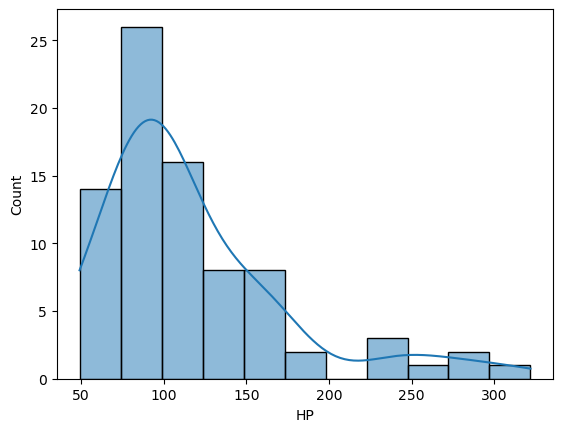

In [21]:
sns.histplot(cars["HP"],kde=True)

<Axes: xlabel='MPG', ylabel='Count'>

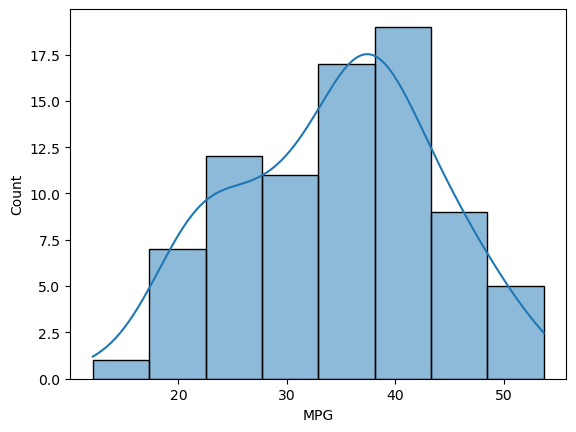

In [22]:
sns.histplot(cars["MPG"],kde=True)

<Axes: xlabel='VOL', ylabel='Count'>

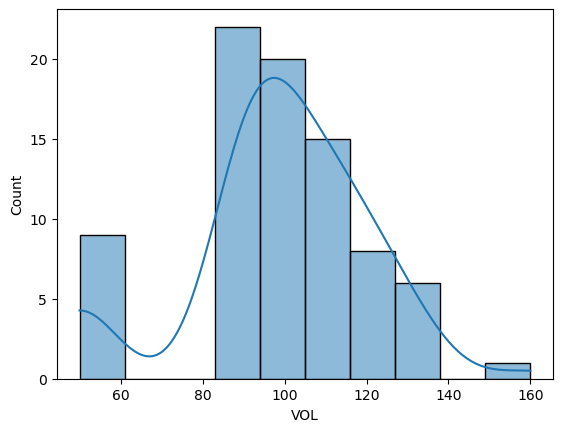

In [23]:
sns.histplot(cars["VOL"],kde=True)

<Axes: xlabel='SP', ylabel='Count'>

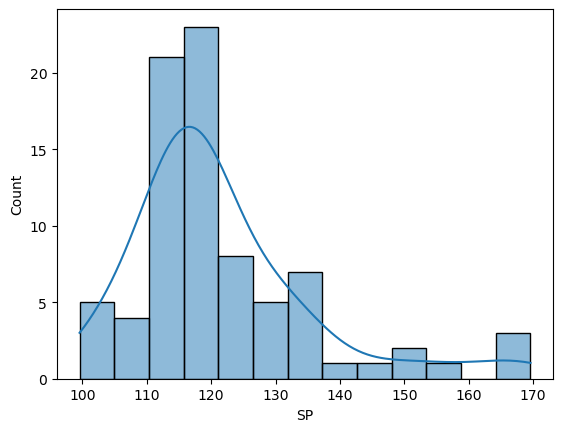

In [24]:
sns.histplot(cars["SP"],kde=True)

<Axes: xlabel='WT', ylabel='Count'>

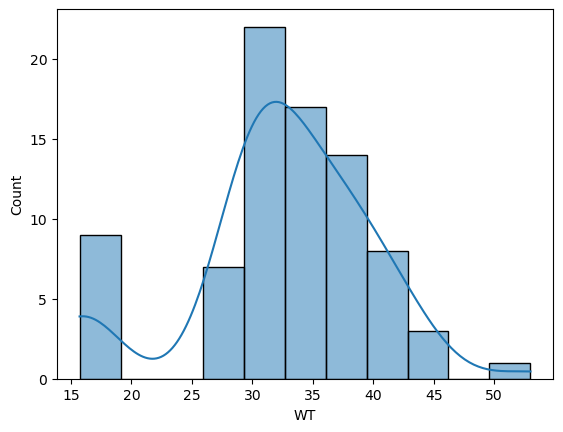

In [25]:
sns.histplot(cars["WT"],kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x16ca677df10>,
 'caps': [<matplotlib.lines.Line2D at 0x16ca677f620>,
 'boxes': [<matplotlib.lines.Line2D at 0x16ca677f050>],
 'medians': [<matplotlib.lines.Line2D at 0x16ca677fb30>],
 'fliers': [<matplotlib.lines.Line2D at 0x16ca677fe00>],
 'means': []}

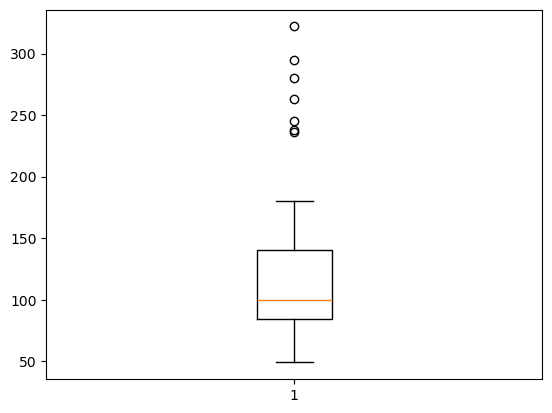

In [27]:
plt.boxplot(cars["HP"])

{'whiskers': [<matplotlib.lines.Line2D at 0x16ca67f8ec0>,
 'caps': [<matplotlib.lines.Line2D at 0x16ca67f9460>,
 'boxes': [<matplotlib.lines.Line2D at 0x16ca67f8c20>],
 'medians': [<matplotlib.lines.Line2D at 0x16ca67f9910>],
 'fliers': [<matplotlib.lines.Line2D at 0x16ca67f9be0>],
 'means': []}

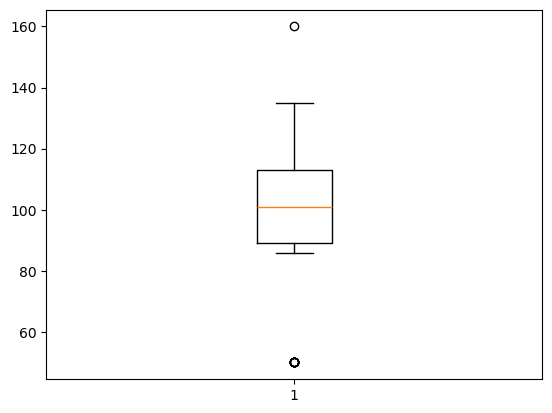

In [28]:
plt.boxplot(cars["VOL"])

{'whiskers': [<matplotlib.lines.Line2D at 0x16ca6842660>,
 'caps': [<matplotlib.lines.Line2D at 0x16ca6842c00>,
 'boxes': [<matplotlib.lines.Line2D at 0x16ca68423c0>],
 'medians': [<matplotlib.lines.Line2D at 0x16ca6843110>],
 'fliers': [<matplotlib.lines.Line2D at 0x16ca68433b0>],
 'means': []}

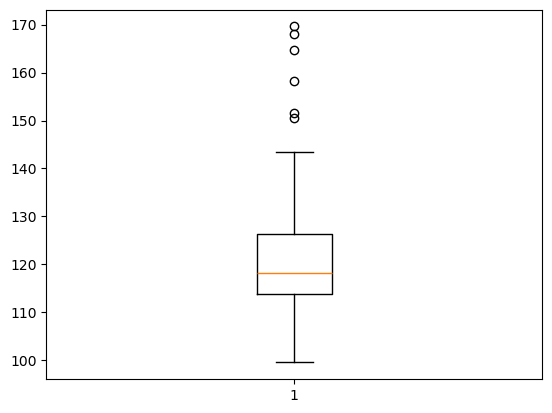

In [29]:
plt.boxplot(cars["SP"])

{'whiskers': [<matplotlib.lines.Line2D at 0x16ca666a000>,
 'caps': [<matplotlib.lines.Line2D at 0x16ca666a480>,
 'boxes': [<matplotlib.lines.Line2D at 0x16ca6669e80>],
 'medians': [<matplotlib.lines.Line2D at 0x16ca666a990>],
 'fliers': [<matplotlib.lines.Line2D at 0x16ca666ac00>],
 'means': []}

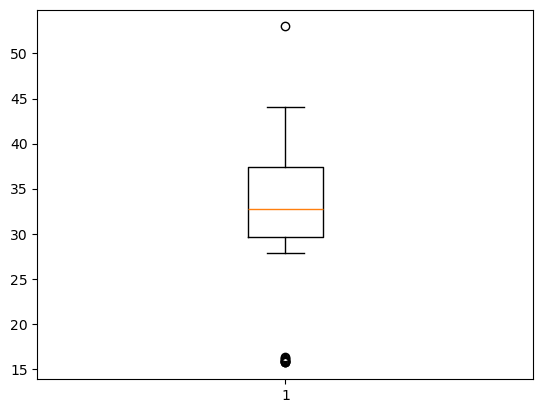

In [30]:
plt.boxplot(cars["WT"])

{'whiskers': [<matplotlib.lines.Line2D at 0x16ca66f0710>,
 'caps': [<matplotlib.lines.Line2D at 0x16ca66f0c80>,
 'boxes': [<matplotlib.lines.Line2D at 0x16ca66f0470>],
 'medians': [<matplotlib.lines.Line2D at 0x16ca66f11c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16ca66f1490>],
 'means': []}

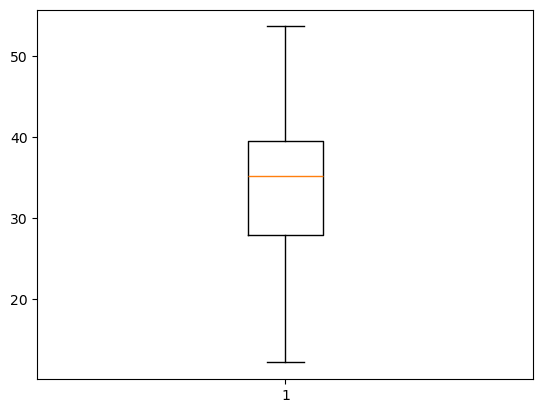

In [31]:
plt.boxplot(cars["MPG"])